In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 240)

In [2]:
df = pd.read_csv('train.csv', index_col = 'qid')

In [3]:
sincere = df.target == 0
df0, df1 = df[sincere], df[sincere == False]

In [4]:
# Create a small dataset of 50k sinceres and 10k insinceres
df60k = pd.concat([df0.sample(50000), df1.sample(10000)])

In [5]:
from sklearn.model_selection import train_test_split
X, Y = df60k.question_text, df60k.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [6]:
# Create a CountVectorizer, fit to the corpus, and
# transform the training and testing questions
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), binary=True)
cv.fit(X)
X_train, X_test = cv.transform(X_train), cv.transform(X_test)

In [7]:
# Fit a logistic regression model and find
# its roc statistics and auc score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_c = LogisticRegression()
lr_c.fit(X_train, y_train)
y_pred = lr_c.predict(X_test)
lr_c_scores = lr_c.predict_proba(X_test)
roc = metrics.roc_curve(y_test, lr_c_scores[:,1])
auc = metrics.roc_auc_score(y_test, lr_c_scores[:,1])

In [8]:
import matplotlib.pyplot as plt

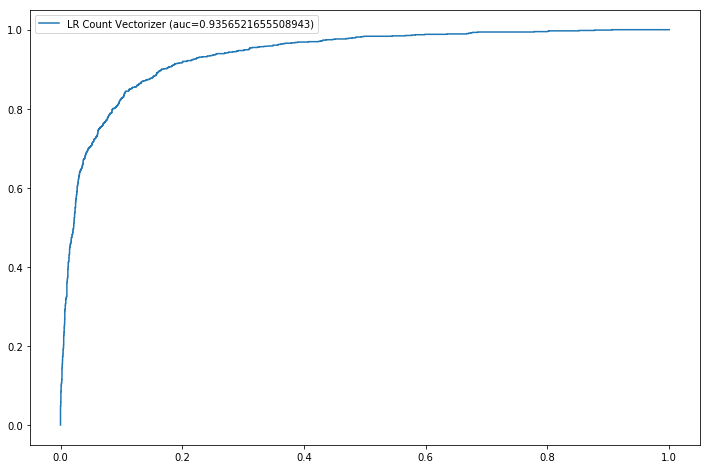

In [9]:
# Plot the ROC curve
fp, tp = roc[0], roc[1]
plt.figure(figsize=(12,8))
plt.plot(fp, tp, label='LR Count Vectorizer (auc={})'.format(auc))
plt.legend()

In [10]:
# Now we want to confirm that the F1 score given by sklearn's 
# f1_score function corresponds to a threshold of 0.5
# First find the f score
f = metrics.f1_score(y_test, y_pred)
print("F score: {}".format(f))

F score: 0.6762342135476463


In [11]:
# Now find precision and recall, and the f score given by
# every combination of the two
pr, re, th = metrics.precision_recall_curve(y_test, lr_c_scores[:,1])
pr, re = pr[:-1], re[:-1]
fs = 2*np.divide(np.multiply(pr, re), np.add(pr, re))

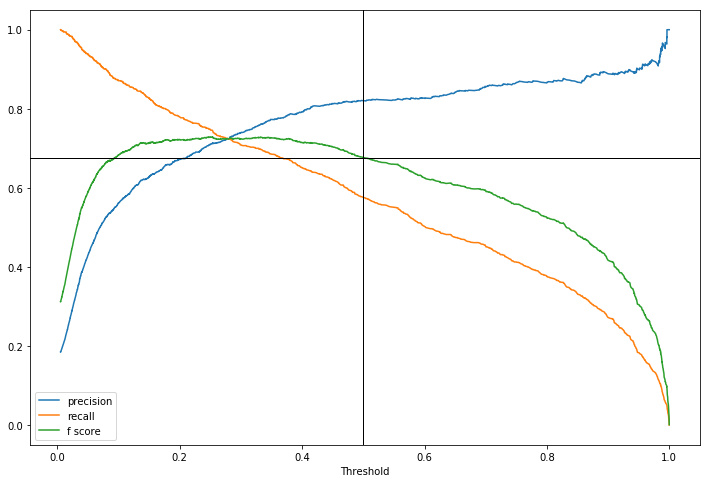

In [12]:
plt.figure(figsize=(12,8))
plt.plot(th, pr, label = 'precision')
plt.plot(th, re, label = 'recall')
plt.plot(th, fs, label = 'f score')
plt.xlabel('Threshold')
plt.axvline(x=0.5, c='k', linewidth=1)
plt.axhline(y=f, c='k', linewidth=1)
plt.legend()

The f score curve clearly intersects the point (threshold = 0.5, fscore = 0.676). We can also isolate the (threshold, fscore) pairs right near a threshold of 0.5 below:

In [13]:
for i in zip(th, fs):
    if abs(i[0] - 0.5) < 0.01:
        print(i)

(0.4910413554065637, 0.6807538549400343)
(0.49125978513426266, 0.681142857142857)
(0.4916442236199658, 0.6803887935963406)
(0.49267007015960923, 0.6796338672768879)
(0.4950299383190545, 0.6788780767029192)
(0.4954510983222646, 0.6781214203894617)
(0.4967657748009366, 0.678510028653295)
(0.49876361564268784, 0.6777522935779816)
(0.4999840455640383, 0.6769936890418818)
(0.5023977921991727, 0.6762342135476463)
(0.5037996801106688, 0.6754738655944859)
(0.5038931969346008, 0.674712643678161)
(0.505428528730621, 0.675100632547441)
(0.5057283700220772, 0.6754890678941312)
(0.5075510347825748, 0.6747265400115141)
(0.5076343546301597, 0.673963133640553)
(0.5090365275792942, 0.6743515850144093)
(0.509923075535104, 0.6735870818915801)
